In [152]:
import pandas as pd
import numpy as np
import seaborn as sns

In [153]:
#df = pd.read_pickle('output_training_size_large_AEM_data_vermeer.pkl')
df = pd.read_pickle('output_training_size_large_AEM_data_vliegenthart.pkl')

In [154]:
def rename_models(x):
    variable_name = x
    if x == 'w2v_model_nr_5_window_10_size_300_negsample_5':
        variable_name = 'w2v 5 (w = 10, d = 300, ns = 5)'
    if x =='w2v_model_nr_1_window_5_size_300_negsample_5':
        variable_name = 'w2v 1 (w = 5, d = 300, ns = 5)'
    if x == 'w2v_model_nr_8_window_47615_size_100_negsample_5':
        variable_name = 'w2v 8 (w = sentence, d = 100, ns = 5)'
    if x =='w2v_model_nr_11_window_47615_size_300_negsample_15':
        variable_name = 'w2v 11 (w = sentence, d = 300, ns = 15)'
    if x =='w2v_model_nr_4_window_10_size_100_negsample_5':
        variable_name = 'w2v 4 (w = 10, d = 100, ns = 5)'
    if x == 'w2v_model_nr_9_window_47615_size_300_negsample_5':
        variable_name = 'w2v 9 (w = sentence, d = 300, ns = 5)'
    if x == 'w2v_model_nr_3_window_5_size_300_negsample_15':
        variable_name = 'w2v 3 (w = 5, d = 300, ns = 15)'
    if x == 'w2v_model_nr_10_window_47615_size_100_negsample_15':
        variable_name = 'w2v 10 (w = sentence, d = 100, ns = 15)'
    if x == 'w2v_model_nr_7_window_10_size_300_negsample_15':
        variable_name = 'w2v 7 (w = 10, d = 100, ns = 15)'
    if x == 'w2v_model_nr_6_window_10_size_100_negsample_15':
        variable_name = 'w2v 6 (w = 10, d = 100, ns = 15)'
    if x == 'w2v_model_nr_2_window_5_size_100_negsample_15':
        variable_name = 'w2v 2 (w = 5, d = 100, ns = 15)'
    if x == 'w2v_model_nr_0_window_5_size_100_negsample_5':
        variable_name = 'w2v 0 (w = 5, d = 100, ns = 5)'
    if x == 'baseline':
        variable_name = 'baseline model'
    if x == 'wiki.nl.vec':
        variable_name = 'pre-trained 01: Wiki FastText'
    if x == 'cow-320.txt':
        variable_name = 'pre-trained 02: COW small'
    return variable_name

df['model'] = df['model'].map(rename_models)

df_n = pd.melt(df, id_vars = ['accuracy', 'train_size', 'model'], var_name='model classifier')
df_n['type'] = df_n['model'] + ' ~ ' + df_n['value'].astype(str)

In [155]:
df_n['n'] = 1
df_n.groupby('model').agg({'n' : sum, 'accuracy': np.mean})

,accuracy,n
model,,
baseline model,0.486709,80
pre-trained 01: Wiki FastText,0.473434,80
pre-trained 02: COW small,0.450287,80
"w2v 0 (w = 5, d = 100, ns = 5)",0.489519,80
"w2v 1 (w = 5, d = 300, ns = 5)",0.500734,80
"w2v 10 (w = sentence, d = 100, ns = 15)",0.497360,80
"w2v 11 (w = sentence, d = 300, ns = 15)",0.505103,80
"w2v 2 (w = 5, d = 100, ns = 15)",0.500438,80
"w2v 3 (w = 5, d = 300, ns = 15)",0.504881,80


In [156]:
df['type'] = df['model'] + ' ~ ' + df['classifier']

In [157]:
df_n = df.pivot(index = 'type', columns = 'train_size', values = 'accuracy')

In [158]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0.80 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Results data Vermeer

Red : value > .80. Yellow: highest value of column

In [151]:
df_n.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

train_size,10,40,160,640,1000,2500,3386
type,,,,,,,
baseline model ~ ET,0.559551,0.571677,0.617859,0.698524,0.727675,0.740628,0.752475
baseline model ~ svm,0.449655,0.656413,0.724594,0.784259,0.779968,0.820669,0.891089
pre-trained 01: Wiki FastText ~ w2v_ET,0.56473,0.648288,0.721888,0.779339,0.786404,0.798379,0.782178
pre-trained 01: Wiki FastText ~ w2v_svm,0.363061,0.425421,0.742634,0.791637,0.824216,0.776089,0.821782
pre-trained 02: COW small ~ w2v_ET,0.569908,0.638131,0.723993,0.777231,0.78399,0.799392,0.80198
pre-trained 02: COW small ~ w2v_svm,0.405351,0.124782,0.587793,0.76423,0.381335,0.775076,0.861386
"w2v 0 (w = 5, d = 100, ns = 5) ~ w2v_ET",0.548331,0.662797,0.763379,0.802881,0.80531,0.818642,0.841584
"w2v 0 (w = 5, d = 100, ns = 5) ~ w2v_svm",0.39298,0.597214,0.779615,0.789881,0.769107,0.790274,0.80198
"w2v 1 (w = 5, d = 300, ns = 5) ~ w2v_ET",0.571059,0.685142,0.76819,0.799719,0.794851,0.820669,0.851485


In [159]:
df_n.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

train_size,10,40,160,640,1000,2500,5000,7500,10000,12459
type,,,,,,,,,,
baseline model ~ ET,0.388557,0.38813,0.428018,0.475879,0.49269,0.508997,0.520572,0.51996,0.522656,0.41
baseline model ~ svm,0.197625,0.319275,0.41705,0.506083,0.52617,0.596183,0.635005,0.636166,0.635156,0.61
pre-trained 01: Wiki FastText ~ w2v_ET,0.308232,0.396677,0.480361,0.520933,0.535513,0.557113,0.581691,0.583399,0.594141,0.56
pre-trained 01: Wiki FastText ~ w2v_svm,0.0941908,0.301542,0.256311,0.505412,0.524786,0.49329,0.523747,0.5583,0.573047,0.52
pre-trained 02: COW small ~ w2v_ET,0.326879,0.396358,0.468264,0.51204,0.52989,0.556517,0.57878,0.584387,0.598828,0.52
pre-trained 02: COW small ~ w2v_svm,0.406646,0.0121415,0.151948,0.406326,0.39865,0.507406,0.605636,0.567787,0.547266,0.33
"w2v 0 (w = 5, d = 100, ns = 5) ~ w2v_ET",0.329269,0.409458,0.493346,0.538048,0.555844,0.586241,0.603387,0.608498,0.607812,0.58
"w2v 0 (w = 5, d = 100, ns = 5) ~ w2v_svm",0.213563,0.352744,0.415759,0.475711,0.469937,0.528979,0.463157,0.513636,0.525,0.52
"w2v 1 (w = 5, d = 300, ns = 5) ~ w2v_ET",0.359949,0.409697,0.479716,0.53377,0.549355,0.575703,0.601535,0.606917,0.613672,0.58


In [149]:
#f=open("Vermeer_Results.html","w")
#f.write(plot.render()) # df is the styled dataframe
#f.close()

In [160]:
def per_type(x):
    var = x
    if x.split('~')[-1] == ' w2v_ET ' and x.startswith('w2v'):
        var = 'w2v_ET_mean'
    elif x.split('~')[-1] == ' w2v_svm' and x.startswith('w2v'):
        var = 'w2v_svm_mean'
    return var

a = df
a['new_label'] = a['type'].apply(per_type)
a = a.groupby(['new_label', 'train_size']).agg(np.mean)
a = a.reset_index(level=[0,1])

,new_label,train_size,accuracy,f1score,precision,recall
0,baseline model ~ ET,10,0.388557,0.217458,0.150976,0.388557
1,baseline model ~ ET,40,0.388130,0.217149,0.150700,0.387970
2,baseline model ~ ET,160,0.428018,0.309636,0.294501,0.429873
3,baseline model ~ ET,640,0.475879,0.366477,0.474059,0.471432
4,baseline model ~ ET,1000,0.492690,0.389487,0.473607,0.488451
5,baseline model ~ ET,2500,0.508997,0.421161,0.539860,0.505617
6,baseline model ~ ET,5000,0.520572,0.438646,0.549903,0.522953
7,baseline model ~ ET,7500,0.519960,0.433271,0.545989,0.518182
8,baseline model ~ ET,10000,0.522656,0.443174,0.563485,0.521094
9,baseline model ~ ET,12459,0.410000,0.350253,0.393333,0.410000


In [161]:
def create_pointplot(df, x_value, y_value, hue=None,  col=None, row = None, wrap=None, size=8, aspect=1.5, title=""):
    p = sns.factorplot(x=x_value, y=y_value, kind='point',  hue=hue, row = row,
                       col=col, col_wrap=wrap, size=size, aspect=aspect, data=df, legend_out=False, palette=sns.color_palette('Set1'))
    p.fig.subplots_adjust(top=0.9)
    p.fig.suptitle(title, fontsize=16)
    p.despine(left=True)
    for ax in p.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    return p

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


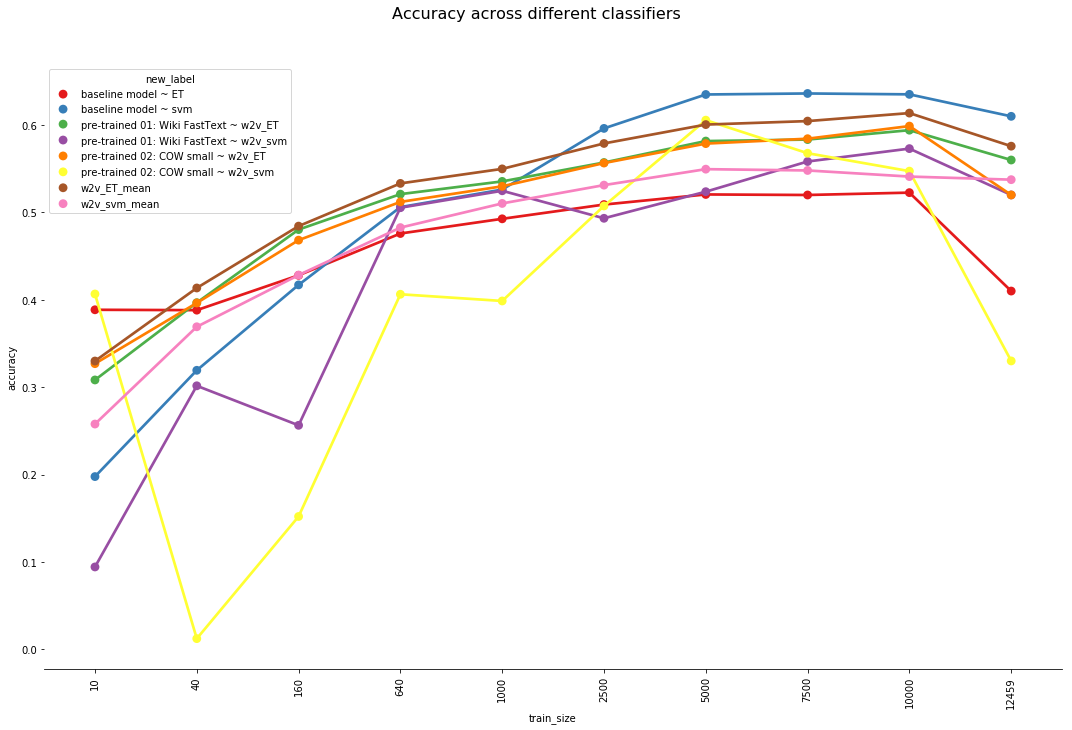

In [163]:
fig = create_pointplot(a, 'train_size', 'accuracy', hue='new_label', size=10, aspect=1.5,
                 title="Accuracy across different classifiers")

fig.savefig("output.png")

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


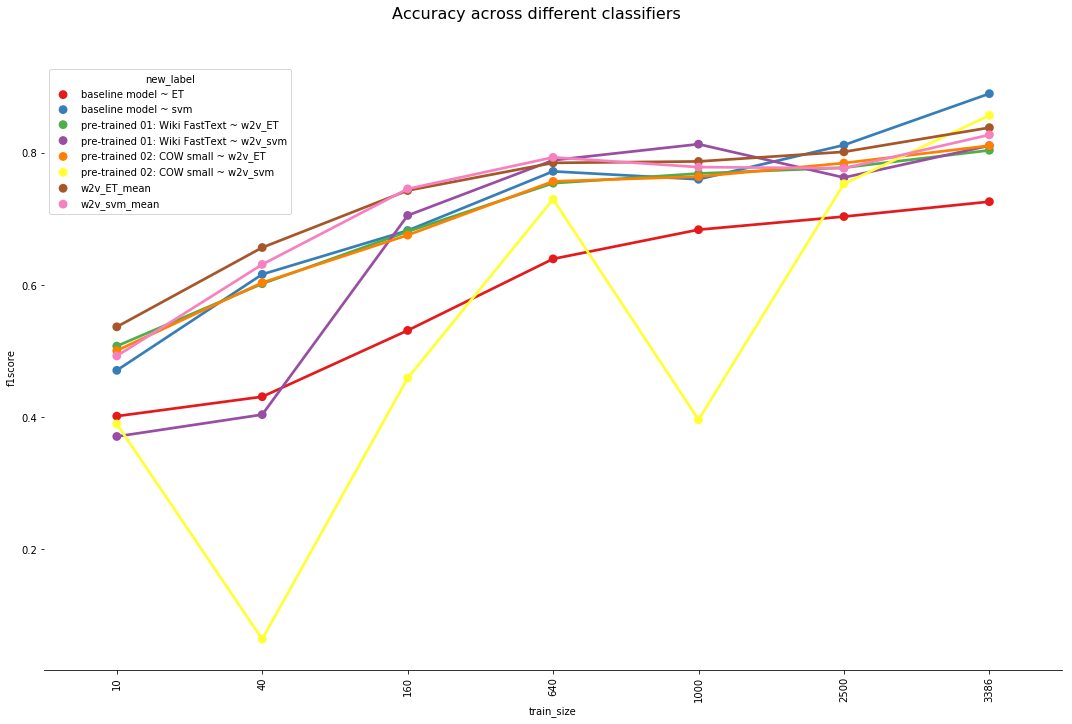

In [141]:
create_pointplot(a, 'train_size', 'f1score', hue='new_label', size=10, aspect=1.5,
                 title="Accuracy across different classifiers")